### Optogenetics approach to calibrate cytoplasmic and membrane units

- Redistributing protein from cytoplasm to membrane using an optogenetics system
- Given that the total amount of protein is fixed, we can calibrate cytoplasmic and membrane units by comparing the gain in membrrane signal to the loss in cytoplasmic signal after exposure to blue light
- The output is the value c (=3.1)
- Note: this notebook relies on raw image quantification performed in _Run/calibration_optogenetics.ipynb_

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import raw_data_path, load_image, rotated_embryo
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
df = pd.read_csv('../../../data/calibration_quantification6.csv')
df

,Unnamed: 0,Line,Embryo,mem_pre,mem_post,cyt_pre,cyt_post
0,0,nwg206,E0,0.120530,0.124433,2.607670,2.529400
1,1,nwg206,E1,0.146103,0.138489,2.962253,2.921667
2,2,nwg206,E2,0.070801,0.074070,2.992054,2.926765
3,3,nwg206,E3,0.056072,0.063549,2.642948,2.608779
4,4,nwg206,E4,0.041430,0.046869,2.537553,2.505190
5,5,sv2061,E0,0.101988,1.012396,2.344419,1.874634
6,6,sv2061,E1,0.176549,0.886908,1.799384,1.417354
7,7,sv2061,E3,0.122269,0.817824,2.419947,1.966456
8,8,sv2061,E4,0.109265,0.777891,2.516674,2.131688
9,9,sv2061,E5,0.104351,0.851903,2.176464,1.773993


### Images

In [3]:
path_nwg206 = raw_data_path + 'Imaging/optogenetics/211217_nwg206_red60lp1000exp/E2'
path_sv2061 = raw_data_path + 'Imaging/optogenetics/211217_sv2061_red60lp1000exp/E0'

In [4]:
def panel(path, ax, pre, scale_bar=False):
    if pre:
        img = load_image(path + '/Pre/rfp_channel_flat.tif')
        roi = np.loadtxt(path + '/Pre/ROI_fit.txt')
    else:
        img = load_image(path + '/Post/rfp_channel_flat.tif')
        roi = np.loadtxt(path + '/Post/ROI_fit.txt')
        
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    print(np.percentile(rotated, 99.9))
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=6.00390290473664)
    ax.axis('off')
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=2)

6.00390290473664
5.517329931725548


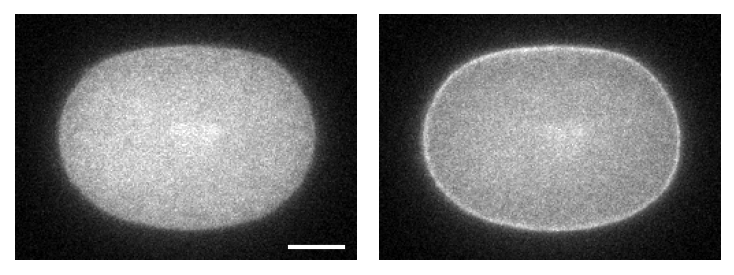

In [5]:
if raw_data_path:
    fig, ax = plt.subplots(1, 2)
    panel(path_sv2061, ax[0], True, scale_bar=True)
    panel(path_sv2061, ax[1], False)
    fig.set_size_inches(5, 2)
    fig.tight_layout()
    fig.savefig('Figs/imgs_1x2.png', dpi=600, transparent=True)

### Conversion factor

In [6]:
c = df[df.Line == 'sv2061'].apply(lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1)
print(c)
print(np.mean(c))
print(np.std(c))

5     2.965611
6     3.090798
7     3.747038
8     3.309121
9     3.094173
10    2.893878
11    2.872588
12    2.859726
dtype: float64
3.1041166403927325
0.2811510504304092


### Pie

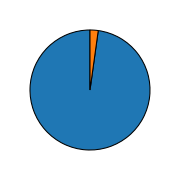

In [7]:
fig, ax = plt.subplots()
cyt = df[df.Line == 'sv2061'].cyt_pre.iloc[0]
mem = df[df.Line == 'sv2061'].mem_pre.iloc[0] * c.iloc[0] * 0.174
ax.pie([cyt, mem], startangle=90, colors=['tab:blue', 'tab:orange'], wedgeprops={'linewidth': 0.5, 'edgecolor': 'k'})
fig.set_size_inches(1, 1)
fig.subplots_adjust(wspace=-0.1, hspace=-0.1)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.savefig('Figs/pie_pre.png', dpi=600, transparent=True)

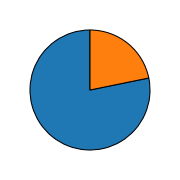

In [8]:
fig, ax = plt.subplots()
cyt = df[df.Line == 'sv2061'].cyt_post.iloc[0]
mem = df[df.Line == 'sv2061'].mem_post.iloc[0] * c.iloc[0] * 0.174
ax.pie([cyt, mem], startangle=90, colors=['tab:blue', 'tab:orange'], wedgeprops={'linewidth': 0.5, 'edgecolor': 'k'})
fig.set_size_inches(1, 1)
fig.subplots_adjust(wspace=-0.1, hspace=-0.1)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.savefig('Figs/pie_post.png', dpi=600, transparent=True)